# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

Kais SELLAMI, Cédric MARTIN (B2)

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [31]:
import csv
import numpy as np
from utils import load_from_csv
from sklearn import tree

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

#Configurations that likely provide diffferent topologies:
     # splitter        max depth          min sample leaf
     # best              None                 1
     # best               10                  50
     # best               5                  500
     # random            None                 1
     # random            10                   50
     # random             5                   500

config = [['best', None, 1], ['best', 10, 50], ['best', 5, 500], ['random', None, 1], ['random', 10, 50], ['random', 5, 500]]

Q2: Train a decision tree for each of the previous configurations on the full dataset

In [32]:
decision_trees = []
decision_trees_config = []
for configuration in config:
    clf = tree.DecisionTreeClassifier(splitter = configuration[0], max_depth = configuration[1], min_samples_leaf = configuration[2])
    decision_trees_config.append(clf)
    decision_trees.append(clf.fit(train_examples, train_labels))

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [33]:
# we will display the accuracy on the 5-cross validation on the different decision trees :
from sklearn.model_selection import KFold
import pandas as pd

kf = KFold(n_splits=5)
results = []
i = 1

for x_train_index, x_test_index in kf.split(train_examples):
    x_train, x_test = train_examples[x_train_index], train_examples[x_test_index]
    y_train, y_test = train_labels[x_train_index], train_labels[x_test_index]
    result = []
    result.append(i)
    for configuration in [decision_trees_config[0], decision_trees_config[2]]:
        clf = configuration.fit(x_train, y_train)
        result.append(clf.score(x_train, y_train))
        result.append(clf.score(x_test, y_test))
        
    results.append(result)
    
    i+=1
results_df = pd.DataFrame(results, columns=["k index", "Train config 1", "Test config 1", "Train config 3", "Test config 3"])
print("config 1 = best splitter, No max depth defined, 1 as min sample leaf \n")
print("config 2 = best splitter, max depth defined = 5, min sample leaf = 500\n \n")
print(results_df)

config 1 = best splitter, No max depth defined, 1 as min sample leaf 

config 2 = best splitter, max depth defined = 5, min sample leaf = 500
 

   k index  Train config 1  Test config 1  Train config 3  Test config 3
0        1        0.697250       0.647393        0.637743       0.624645
1        2        0.694642       0.660664        0.636083       0.635071
2        3        0.698198       0.644550        0.641773       0.636967
3        4        0.696137       0.652751        0.641858       0.636622
4        5        0.698744       0.629981        0.643043       0.631879


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

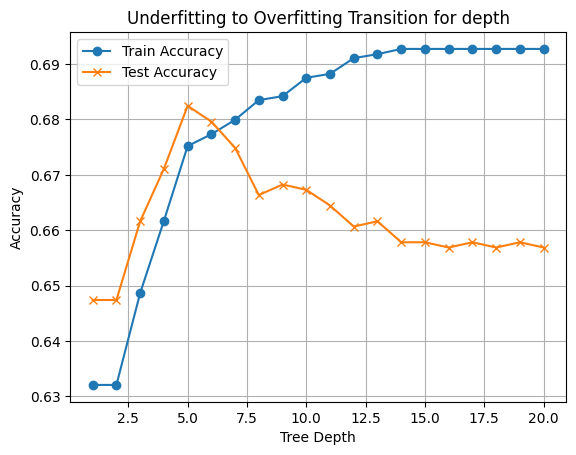

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)

train_best_scores = []
test_best_scores = []
train_random_scores = []
test_random_scores = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    train_best_scores.append(clf.score(x_train, y_train))
    test_best_scores.append(clf.score(x_test, y_test))
    

# Plotting
plt.plot(depths, train_best_scores, label='Train Accuracy', marker='o')
plt.plot(depths, test_best_scores, label='Test Accuracy', marker='x')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Underfitting to Overfitting Transition for depth")
plt.legend()
plt.grid(True)
plt.show()


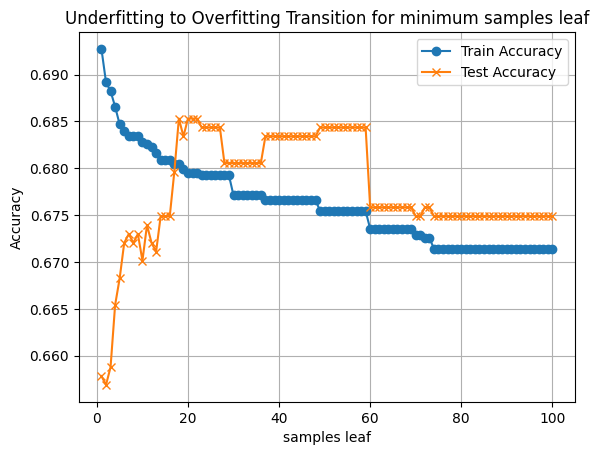

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = load_wine()
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)

train_best_scores = []
test_best_scores = []
samples_leaf = range(1, 101)

for leaf in samples_leaf:
    clf = DecisionTreeClassifier(min_samples_leaf=leaf)
    clf.fit(x_train, y_train)
    train_best_scores.append(clf.score(x_train, y_train))
    test_best_scores.append(clf.score(x_test, y_test))
    
plt.plot(samples_leaf, train_best_scores, label='Train Accuracy', marker='o')
plt.plot(samples_leaf, test_best_scores, label='Test Accuracy', marker='x')
plt.xlabel("samples leaf")
plt.ylabel("Accuracy")
plt.title("Underfitting to Overfitting Transition for minimum samples leaf")
plt.legend()
plt.grid(True)
plt.show()


### splitter
Through the tests run during the lab, the splitter strategy (best or random) does almost not change our accuracy.
### maximum depth
We notice in the previous graphs that the best configurations in term of maximum tree depth is 5. We can note that for a depth in the range of [4 - 7] the accuracy is acceptable (>67%)
### minimum samples leaf
We note that the best accuracy on the test samples is located between 15 and 20.
Actually for a minimum accuracy of 68%, a minimum samples leaf value should be in the range [ 18 - 60 ] with a best accuracy at 20.
### best configuration
Now, in order to select the best configuration in term of depth and minimum samples leaf, we are going to test the two configurations. The results will be exposed below.

In [72]:
depths = range(4, 8)
min_leaf = range(18, 60)
results = []
for d in depths:
    result = []
    for leaf in min_leaf:
        x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)
        clf = DecisionTreeClassifier(splitter = 'best', max_depth = d ,min_samples_leaf=leaf)
        clf.fit(x_train, y_train)
        result.append(clf.score(x_train, y_train))
    results.append(result)

test_df = pd.DataFrame(results, index=[f"depth={d}" for d in depths], columns=min_leaf)
print(test_df)

               18        19        20        21        22        23        24  \
depth=4  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451   
depth=5  0.673542  0.673542  0.673542  0.673542  0.673542  0.673542  0.673542   
depth=6  0.674727  0.674727  0.674253  0.674253  0.674253  0.674016  0.674016   
depth=7  0.676624  0.676624  0.676150  0.676150  0.676150  0.675913  0.675913   

               25        26        27  ...        50        51        52  \
depth=4  0.661451  0.661451  0.661451  ...  0.661451  0.661451  0.661451   
depth=5  0.673542  0.673542  0.673542  ...  0.673542  0.673542  0.673542   
depth=6  0.674016  0.674016  0.674016  ...  0.673542  0.673542  0.673542   
depth=7  0.675913  0.675913  0.675913  ...  0.673779  0.673779  0.673779   

               53        54        55        56        57        58        59  
depth=4  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451  0.661451  
depth=5  0.673542  0.673542  0.673542  0.673542  0.67

In [79]:
argm = np.argmax(results)
i = argm//(60-18)
j = argm%(60-18)

print("maximum accuracy = ",results[i][j])
print("best configuration : depth = ", 4+i, " and minimum samples leaf = ", 18+j)

maximum accuracy =  0.676623992413466
best configuration : depth =  7  and minimum samples leaf =  18


In [83]:
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier(splitter = 'best', max_depth = 7,min_samples_leaf=18) 
clf.fit(x_train, y_train)
print("train accurancy = ",clf.score(x_train, y_train)) 

train accurancy =  0.676623992413466


Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

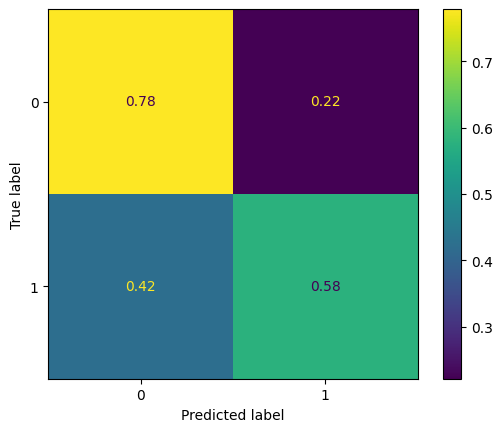

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, normalize = 'true')

Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate